In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
#log tranform
data = pd.DataFrame({'value':[-2,30,-23,45,23,5,35,-10]})
data['log(x+1)'] = (data['value']+1).transform(np.log)

In [19]:
#Negative value handling
data['log(x-min(x)+1)'] = (data['value'] - data['value'].min() + 1 ).transform(np.log)

In [20]:
data

,value,log(x+1),log(x-min(x)+1)
0,-2,NaN,3.091042
1,30,3.433987,3.988984
2,-23,NaN,0.000000
3,45,3.828641,4.234107
4,23,3.178054,3.850148
5,5,1.791759,3.367296
6,35,3.583519,4.077537
7,-10,NaN,2.639057


In [21]:
#standardized 
data['standardize'] = (data['value'] - data['value'].mean()) / data['value'].std()

In [22]:
data['value'].mean()

12.875

In [23]:
data

,value,log(x+1),log(x-min(x)+1),standardize
0,-2,NaN,3.091042,-0.621422
1,30,3.433987,3.988984,0.715418
2,-23,NaN,0.000000,-1.498723
3,45,3.828641,4.234107,1.342062
4,23,3.178054,3.850148,0.422985
5,5,1.791759,3.367296,-0.328988
6,35,3.583519,4.077537,0.924300
7,-10,NaN,2.639057,-0.955632


In [24]:
data = pd.DataFrame({'date':['01-01-2017','04-12-2008','23-06-1988','25-08-1999','20-02-1993']})

In [25]:
#Transform string to date
from datetime import date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

In [26]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['passed_year'] = date.today().year - data['date'].dt.year
data['passed_month'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

In [27]:
data['day_name'] = data['date'].dt.day_name()

data

,date,year,month,passed_year,passed_month,day_name
0,2017-01-01,2017,1,5,60,Sunday
1,2008-12-04,2008,12,14,157,Thursday
2,1988-06-23,1988,6,34,403,Thursday
3,1999-08-25,1999,8,23,269,Wednesday
4,1993-02-20,1993,2,29,347,Saturday


In [28]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
household = pd.read_csv(url)

In [29]:
household['longitude'] = household['longitude'] * -1 

In [30]:
data = household.loc[:, ["median_income", "latitude", "longitude"]]
data.head()

,median_income,latitude,longitude
0,8.3252,37.88,122.23
1,8.3014,37.86,122.22
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25


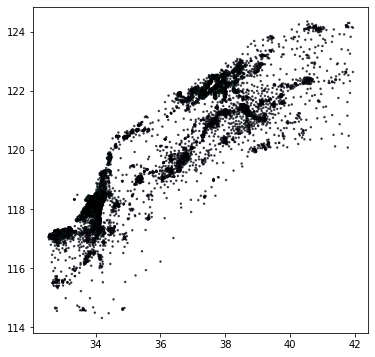

In [31]:
x = data['latitude']
y = data['longitude']
z = data['median_income']

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 2,
           c=z)
plt.show()

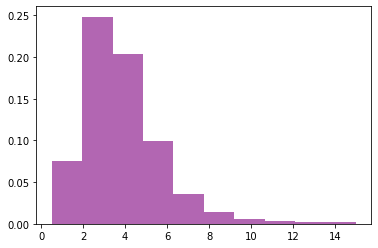

In [32]:
plt.hist(data['median_income'],
         density=True,
         histtype='stepfilled',
         facecolor='purple',
         alpha=0.6)
plt.show()

In [33]:
data.isnull().sum()

median_income    0
latitude         0
longitude        0
dtype: int64

dropping outlier with standard deviation

In [34]:
factor = 3
upper_lim = data['median_income'].mean() + data['median_income'].std() * factor
lower_lim = data['median_income'].mean() - data['median_income'].std() * factor

In [35]:
data = data[(data['median_income'] < upper_lim ) & (data['median_income'] > lower_lim )]
data

,median_income,latitude,longitude
0,8.3252,37.88,122.23
1,8.3014,37.86,122.22
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25
...,...,...,...
20635,1.5603,39.48,121.09
20636,2.5568,39.49,121.21
20637,1.7000,39.43,121.22
20638,1.8672,39.43,121.32


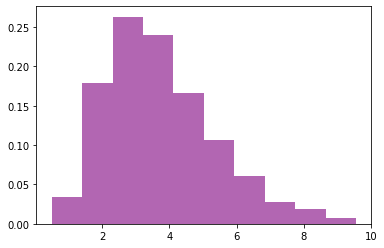

In [38]:
plt.hist(data['median_income'],
         density=True,
         histtype='stepfilled',
         facecolor='purple',
         alpha=0.6)
plt.show()

In [39]:
data['median_income'].describe()

count    20295.000000
mean         3.738741
std          1.604919
min          0.499900
25%          2.550750
50%          3.507600
75%          4.667050
max          9.556100
Name: median_income, dtype: float64

In [40]:
labels = ['Low Income', 'Lower-middle Income', 'Upper-middle Income', 'High Income']
data['income_level'] = pd.qcut(data['median_income'], 4, labels = labels )

In [41]:
data

,median_income,latitude,longitude,income_level
0,8.3252,37.88,122.23,High Income
1,8.3014,37.86,122.22,High Income
2,7.2574,37.85,122.24,High Income
3,5.6431,37.85,122.25,High Income
4,3.8462,37.85,122.25,Upper-middle Income
...,...,...,...,...
20635,1.5603,39.48,121.09,Low Income
20636,2.5568,39.49,121.21,Lower-middle Income
20637,1.7000,39.43,121.22,Low Income
20638,1.8672,39.43,121.32,Low Income


In [42]:
pd.qcut(data['median_income'],q =4).value_counts()

(2.551, 3.508]    5075
(0.499, 2.551]    5074
(4.667, 9.556]    5074
(3.508, 4.667]    5072
Name: median_income, dtype: int64

([<matplotlib.axis.XTick at 0x26427fdcb48>,
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Lower-middle Income'),
  Text(2, 0, 'Upper-middle Income'),
  Text(3, 0, 'High Income')])

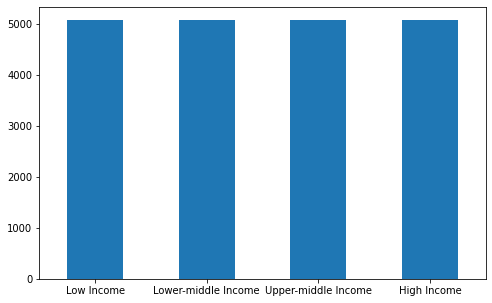

In [43]:
count = data['income_level'].value_counts()
count.plot(kind='bar',figsize=(8,5), rot=0)
index = range(len(labels))
plt.xticks(index, labels)

In [44]:
#Log transformming
log_table = data.copy()
log_table['log(x+1)'] = (log_table['median_income']+1).transform(np.log)
log_table['log(x-min(x)+1)'] = (log_table['median_income'] - log_table['median_income'].min() + 1 ).transform(np.log)

In [45]:
log_table.head(5)

,median_income,latitude,longitude,income_level,log(x+1),log(x-min(x)+1)
0,8.3252,37.88,122.23,High Income,2.232720,2.177623
1,8.3014,37.86,122.22,High Income,2.230165,2.174922
2,7.2574,37.85,122.24,High Income,2.111110,2.048660
3,5.6431,37.85,122.25,High Income,1.893579,1.815346
4,3.8462,37.85,122.25,Upper-middle Income,1.578195,1.469325


In [46]:
#one hot encoding
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(data['income_level'].values)
y

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
class_le.inverse_transform(y)

array(['High Income', 'High Income', 'High Income', ..., 'Low Income',
       'Low Income', 'Low Income'], dtype=object)

In [48]:
X = data[['latitude', 'longitude']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[515.  , 122.23],
       [513.  , 122.22],
       [512.  , 122.24],
       ...,
       [670.  , 121.22],
       [670.  , 121.32],
       [664.  , 121.24]])

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

array([[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 122.23],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 122.22],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 122.24],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 121.22],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 121.32],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  , 121.24]])

In [50]:
pd.get_dummies(data[['latitude', 'longitude', 'income_level']])

,latitude,longitude,income_level_Low Income,income_level_Lower-middle Income,income_level_Upper-middle Income,income_level_High Income
0,37.88,122.23,0,0,0,1
1,37.86,122.22,0,0,0,1
2,37.85,122.24,0,0,0,1
3,37.85,122.25,0,0,0,1
4,37.85,122.25,0,0,1,0
...,...,...,...,...,...,...
20635,39.48,121.09,1,0,0,0
20636,39.49,121.21,0,1,0,0
20637,39.43,121.22,1,0,0,0
20638,39.43,121.32,1,0,0,0


In [51]:
#Normalization
data['normalized'] = (data['median_income'] - data['median_income'].min()) / (data['median_income'].max() - data['median_income'].min())
data['stardardized'] = (data['median_income'] - data['median_income'].mean()) / data['median_income'].std()

In [52]:
data

,median_income,latitude,longitude,income_level,normalized,stardardized
0,8.3252,37.88,122.23,High Income,0.864082,2.857751
1,8.3014,37.86,122.22,High Income,0.861454,2.842922
2,7.2574,37.85,122.24,High Income,0.746174,2.192422
3,5.6431,37.85,122.25,High Income,0.567920,1.186576
4,3.8462,37.85,122.25,Upper-middle Income,0.369504,0.066956
...,...,...,...,...,...,...
20635,1.5603,39.48,121.09,Low Income,0.117091,-1.357353
20636,2.5568,39.49,121.21,Lower-middle Income,0.227126,-0.736449
20637,1.7000,39.43,121.22,Low Income,0.132517,-1.270308
20638,1.8672,39.43,121.32,Low Income,0.150979,-1.166128


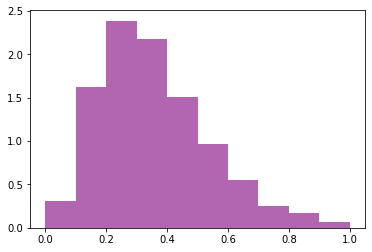

In [53]:
plt.hist(data['normalized'],
         density=True,
         histtype='stepfilled',
         facecolor='purple',
         alpha=0.6)
plt.show()